# REGRESSÃO LINEAR SIMPLES

#### Definindo o Problema de Negócio
Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston. Para cada casa temos diversas variáveis explanatórias. Sendo assim, podemos resolver este problema empregando Regressão Linear Simples ou Múltipla.

#### Definindo o Dataset
Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

- CRIM: per capita crime rate by town / 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- TARGET: Median value of owner-occupied homes in $1000's

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
dataset = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap05_Regressao_pt2/dados/PY/BostonHousing.csv")

In [4]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
dataset = dataset.rename(columns = {'medv': "Target"})

In [6]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# Calculando a média da variavel de resposta
valor_medio_esperado_na_previsao = dataset['Target'].mean()

In [8]:
valor_medio_esperado_na_previsao

22.532806324110677

In [9]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['Target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


<Axes: ylabel='Frequency'>

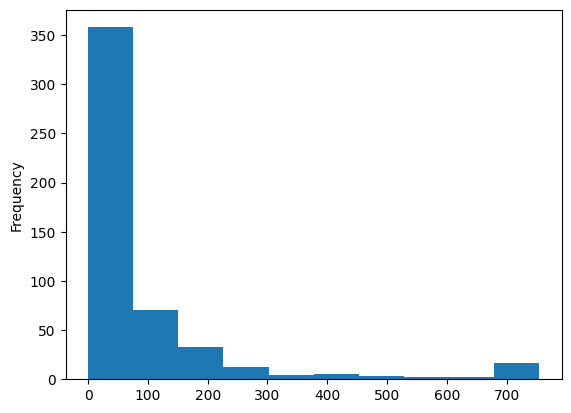

In [10]:
squared_errors.plot(kind = 'hist')

In [11]:
# Para Regressão Simples, usaremos a variável RM que representa o nmr médio de quartos nas casas

In [12]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
 observations = float(len(variable))
 return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias,1)))

In [14]:
# Imprime o desvio padrao via formula e via Numpy da variável RM (qtde de quartos)
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['rm']), np.std(dataset['rm'])))

Resultado da Função: 0.70139 Resultado do Numpy: 0.70488


In [15]:
# Função para calcular a variância da variável RM e a correlação com a variável target (MANUAL)
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [17]:
# COMPARANDO O RESULTADO DAS FUNÇÕES COM A FUNÇÃO PEARSONR DO SCIPY
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['rm'], dataset['Target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['rm'], dataset['Target'])[0])

Nossa estimativa de Correlação: 0.69193


ValueError: array must not contain infs or NaNs

In [19]:
# colocando em gráfico 
x_range = [dataset['rm'].min(), dataset['rm'].max()]
y_range = [dataset['Target'].min(), dataset['Target'].max()]

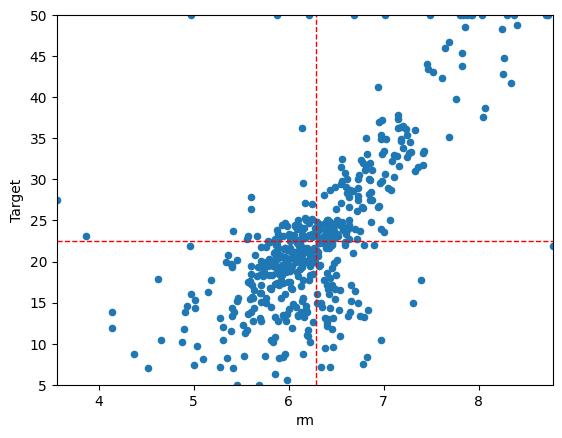

In [20]:
# PLOT
scatter_plot = dataset.plot(kind = 'scatter', x='rm', y='Target', xlim=x_range, ylim=y_range)

# Calculo da média 
meanY = scatter_plot.plot(x_range, [dataset['Target'].mean(),dataset['Target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['rm'].mean(), dataset['rm'].mean()], y_range, '--', color = 'red', linewidth = 1)

# REGRESSÃO LINEAR COM StasModels

In [21]:
# Importando funções 
import statsmodels.api as sm

In [22]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix
y = dataset['Target']
x = dataset['rm']

In [23]:
# Esse comando adiciona os valores dos coeficientes a variavel X( o bias será calculado internamente pela funcao)
x = sm.add_constant(x)

In [24]:
x.head()

,const,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
